In [1]:
# Chargement des librairies
import datetime
import sys
from datetime import datetime
import numpy as np
import pandas as pd
import pickle
import os
import time
from IPython.core.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Réduction dimension
from sklearn.manifold import TSNE
# Clustering
from sklearn.cluster import KMeans
# Traitement images
import PIL
from PIL import Image, ImageOps, ImageFilter
#import cv2
from scipy.ndimage import gaussian_filter

# Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
# Valide code pep8
#%load_ext pycodestyle_magic
#%pycodestyle_on
# %pycodestyle_off


now = datetime.now().isoformat()
print('Lancé le           : ' + now)

Lancé le           : 2022-05-06T10:18:00.090172


In [2]:
dico_pd_option = {
    'display.max_rows': 400,
    'display.max_column': 200,
    'display.width': 300,
    'display.precision': 5,
    'display.max_colwidth': 1000,
    'mode.chained_assignment': None
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)

In [3]:
# Nombre aléatoire pour la reproductibilité des résultats
seed = 21

In [4]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv', delimiter=',',encoding='utf-8')

data.head()

uniq_id            crawl_timestamp                                                                                                                      product_url                                                     product_name  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH                                       Sathiyas Cotton Bath Towel   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y                              Eurospa Cotton Terry Face Towel Set   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree               pid  retail_price  discounted_price                                 image  is_FK_Advantage_product  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]  CRNEG7BKMFFYHQ8Z        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]  BTWEGFZHGBXPHZUH         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]  BTWEG6SHXTDB2A2Y           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]  BDSEJT9UQWHDUBH4        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]  BDSEJTHNGWVGWWQU        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [5]:
# Taille : nombre de lignes/colonnes
nRow, nVar = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 1050 lignes et 15 variables.


In [13]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [6]:
import skimage
skimage.__version__

'0.19.2'

In [7]:
# Les noms des images sont dans la colonne uniq_id

In [6]:
# Ajout variable image_rep
# ex : data/Images/02127f52e96fb72c66bf081d25104ef8.jpg
path = "C://Users/Catherine/data/images/"
data['image_rep'] = [path + row for row in data['image']]

In [7]:
from os import listdir

In [8]:
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [9]:
# Découpe les sous-catégories dans des nouvelles variables du dataframe
work = data['product_category_tree'].str.split(' >> ', expand=True)
data['Categorie_1'] = work[0]
# Nettoye les [" et "]
data.replace('\\["', '', regex=True, inplace=True)
data.replace('"\\]', '', regex=True, inplace=True)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data['Categorie_1'])
data

uniq_id            crawl_timestamp                                                                                                                      product_url                                                       product_name  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z         Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH                                         Sathiyas Cotton Bath Towel   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y                                Eurospa Cotton Terry Face Towel Set   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4    SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU              Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                ...                        ...                                                                                                                              ...                                                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000                   http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=STIE88ZGTX65GH4V                     Oren Empower Extra Large Self Adhesive Sticker   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000                                   http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ                             Wallmantra Large Vinyl Sticker Sticker   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000  http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5uvggyhfrd4p?pid=STIE5UVGW2JWVWCT  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000                                  http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE                            Wallmantra Medium Vinyl Sticker Sticker   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000                                     http://www.flipkart.com/uberlyfe-large-vinyl-sticker/p/itme2zepqqzr9jt5?pid=STIE2ZEPACRQJKH7                                       Uberlyfe Large Vinyl Sticker   

                                                                                                                      product_category_tree               pid  retail_price  discounted_price                                 image  is_FK_Advantage_product  \
0                              Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...  CRNEG7BKMFFYHQ8Z        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1     Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...  BTWEGFZHGBXPHZUH         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2      Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towe

In [11]:
data = data.copy()
data = data[['image', 'image_rep', 'Categorie_1']]
data.head(3)

image                                                             image_rep      Categorie_1
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  C://Users/Catherine/data/images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  C://Users/Catherine/data/images/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  C://Users/Catherine/data/images/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care

In [12]:
# Analyse exploratoire des images

In [11]:
# Nombre d'images par catégorie ?
df_image_par_cat = data.groupby('Categorie_1').agg({'image' : 'count'})
df_image_par_cat

image
Categorie_1                      
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150

In [14]:
# 150 images par catégorie 

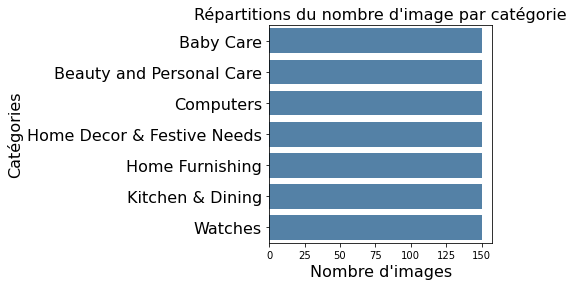

In [12]:
plt.figure(figsize=(4, 4))
sns.barplot(y=df_image_par_cat.index, x=df_image_par_cat.image,
            data=df_image_par_cat, color='SteelBlue')
plt.title('Répartitions du nombre d\'image par catégorie', fontsize=16)
plt.xlabel('Nombre d\'images', fontsize=16)
plt.ylabel('Catégories', fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

In [13]:
df_visu = df_image_par_cat.reset_index()

In [14]:
df_visu

Categorie_1  image
0                   Baby Care    150
1    Beauty and Personal Care    150
2                   Computers    150
3  Home Decor & Festive Needs    150
4             Home Furnishing    150
5            Kitchen & Dining    150
6                     Watches    150

In [15]:
label= list(df_visu["Categorie_1"]) 

In [16]:
lab=np.unique(label)
lab

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype='<U26')

[None, Text(0.5, 1.0, 'Categories')]

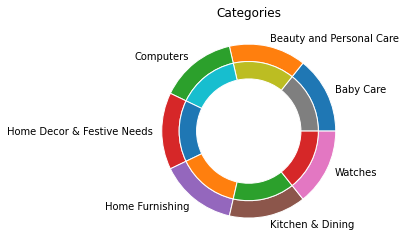

In [17]:
size = 0.2
fig, ax = plt.subplots()

ax.pie(df_visu.groupby('Categorie_1')['image'].sum(), radius=1, labels=lab,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df_visu['image'], radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Categories')

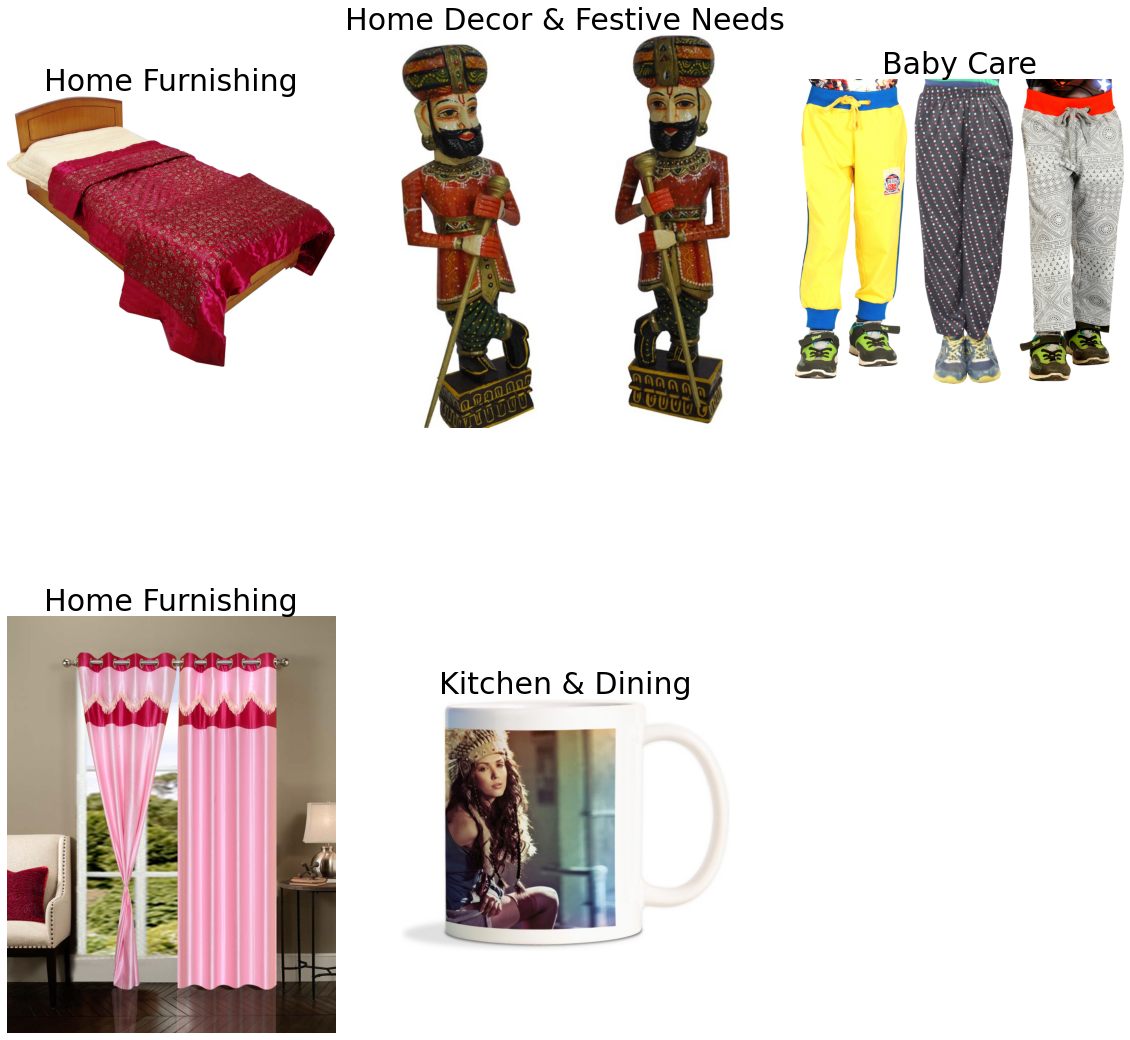

In [18]:
# 1 échantillon d'images
# Sélection de 6 images au hasard
df_visu_img = data.sample(5).reset_index()
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    img = np.array(Image.open(df_visu_img['image_rep'][i]))
    plt.imshow(img)
    plt.title(df_visu_img['Categorie_1'][i], fontsize=30)
    plt.axis('off')

In [19]:
# Largeur des images
data['Largeur_img'] = [Image.open(row).width for row in data['image_rep']]    

In [20]:
# 'Hauteur des images
data['Hauteur_img'] = [Image.open(row).height for row in data['image_rep']] 

In [21]:
# Statistiques descriptives
data.describe()

retail_price  discounted_price       label  Largeur_img  Hauteur_img
count    1049.00000        1049.00000  1050.00000   1050.00000   1050.00000
mean     2186.19733        1584.52717     3.00000   1196.57048   1220.03810
std      7639.22941        7475.09968     2.00095    864.07676    744.84137
min        35.00000          35.00000     0.00000    145.00000    160.00000
25%       555.00000         340.00000     1.00000    747.25000    844.00000
50%       999.00000         600.00000     3.00000   1100.00000   1100.00000
75%      1999.00000        1199.00000     5.00000   1214.25000   1360.00000
max    201000.00000      201000.00000     6.00000   8484.00000  11042.00000

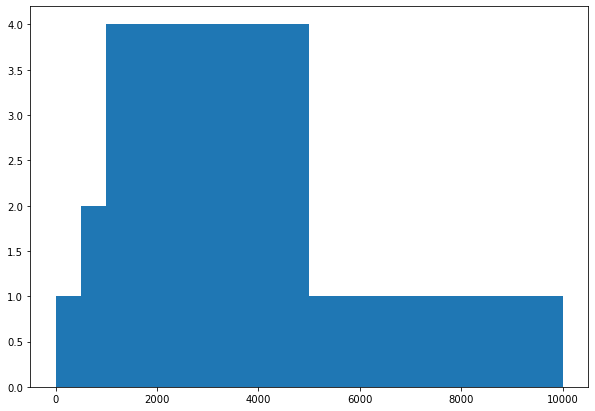

In [22]:
# Plage des largeurs des images
from matplotlib import pyplot as plt 
import numpy as np 
  
  
a = np.array([1050, 1196, 864, 145, 747,  
              1100, 1214, 8484]) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(a, bins = [0, 500, 1000, 5000, 10000]) 
  
plt.show() 

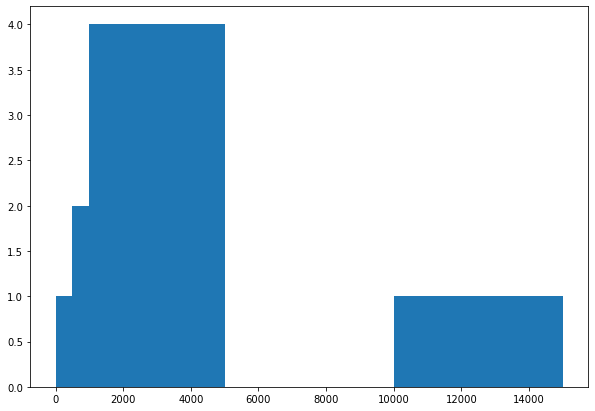

In [23]:
# Plage des hauteurs des images
from matplotlib import pyplot as plt 
import numpy as np 
 
  
a = np.array([1050, 1220, 744, 160, 844,1100, 1360, 11042]) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(a, bins = [0, 500, 1000, 5000, 10000, 15000]) 
  
plt.show() 

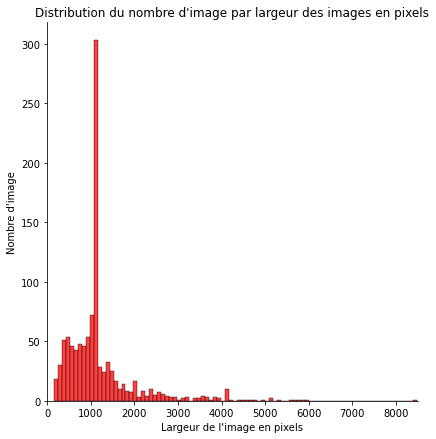

In [24]:
# Répartition du nombre d'images par taille de l'image en pixel
sns.displot(data['Largeur_img'], color='red', height=6)
plt.title('Distribution du nombre d\'image par largeur des images en pixels')
plt.xlim(0, 8500)
plt.xlabel('Largeur de l\'image en pixels')
plt.ylabel('Nombre d\'image')
plt.show()

In [25]:
#Les largeurs des images ne sont pas uniformes et réparties de manière inégale, 
#il faudra les uniformiser pour utiliser les algorithmes de traitement des images.

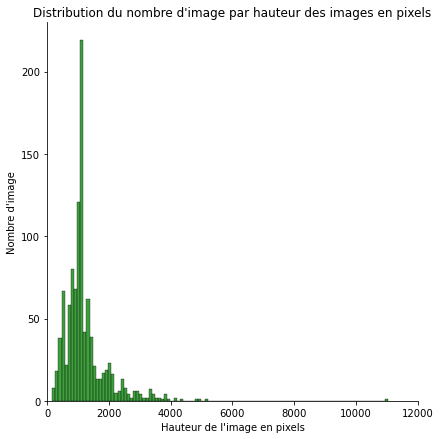

In [26]:
# Répartition du nombre d'images par taille de l'image en pixel
sns.displot(data['Hauteur_img'], color='green', height=6)
plt.title('Distribution du nombre d\'image par hauteur des images en pixels')
plt.xlim(0, 12000)
plt.xlabel('Hauteur de l\'image en pixels')
plt.ylabel('Nombre d\'image')
plt.show()

In [27]:
# TRAVAIL SUR 1 IMAGE - ETUDE DES PARAMETRES ET DES FILTRES

In [28]:
# image 55b85ea15a1536d46b7190ad6fff8ce7.jpg

In [29]:
# On peut ouvrir un fichier image (jpg, png, tiff...) comme un tableau numpy en passant le chemin du fichier 
# à la fonction skimage.io.imread

In [30]:
from skimage import io
image = io.imread(r"C:\Users\Catherine\7e3d8e737aec8f1eca019302593c732e.jpg")

In [31]:
# On peut ouvrir des images en couleur ou en noir et blanc. Les images en couleur ont trois dimensions,
# les images en noir et blanc en ont deux

In [32]:
# IMAGE EN COULEUR

In [33]:
image.shape

(733, 1100, 3)

In [34]:
print(image)

[[[105  94 170]
  [ 97  86 162]
  [ 97  87 160]
  ...
  [ 31  63 138]
  [ 29  66 134]
  [ 36  75 140]]

 [[ 93  91 166]
  [ 85  83 158]
  [ 85  83 156]
  ...
  [ 26  58 131]
  [ 25  60 128]
  [ 29  68 133]]

 [[ 75  87 159]
  [ 67  79 151]
  [ 68  82 155]
  ...
  [ 27  57 130]
  [ 24  57 126]
  [ 26  64 129]]

 ...

 [[118  77  93]
  [101  64  82]
  [ 83  49  74]
  ...
  [ 24  16  13]
  [ 28  20  17]
  [ 42  34  31]]

 [[117  79  94]
  [107  69  90]
  [ 97  64  91]
  ...
  [ 30  22  19]
  [ 34  26  23]
  [ 48  40  37]]

 [[131  92 110]
  [124  89 109]
  [125  95 123]
  ...
  [ 39  31  28]
  [ 43  35  32]
  [ 57  49  46]]]


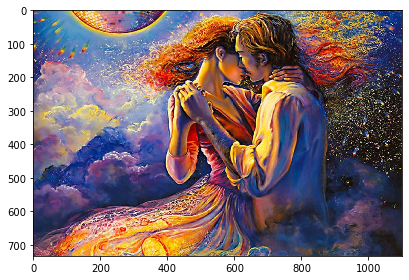

In [37]:
# L’affichage d’une image se fait grâce à la fonction skimage.io.imshow.
io.imshow(image[...]) #  

In [38]:
# IMAGE EN NOIR ET BLANC

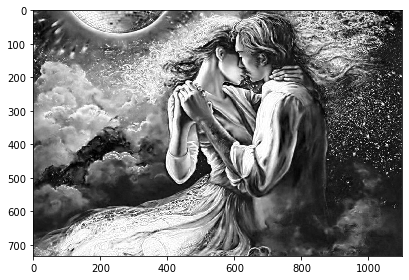

In [39]:
io.imshow(image[..., 0]) # grayscale image

In [40]:
# Type des tableaux d'image

In [41]:
#Les tableaux d’images peuvent être soit des tableaux d’entier, soit des tableaux de flottants. 
#La plupart des formats d’image stockent les valeurs des pixels sous forme d’entiers; 
#le format le plus classique correspond à des entiers codés sur 8 bits (entre 0, et 255), 
#ce qui correspond au type np.uint8 de numpy (entier non signé sur 8 bits).

In [42]:
image.dtype

dtype('uint8')

In [43]:
#Il est par contre naturel d’utiliser des flottants dès qu’on fait des opérations sur les pixels dans l’espace des réels, 
#comme des multiplications ou des divisions par des réels.
#Par conséquent, certaines fonctions de skimage renvoient un tableau de type différent du tableau d’entrée

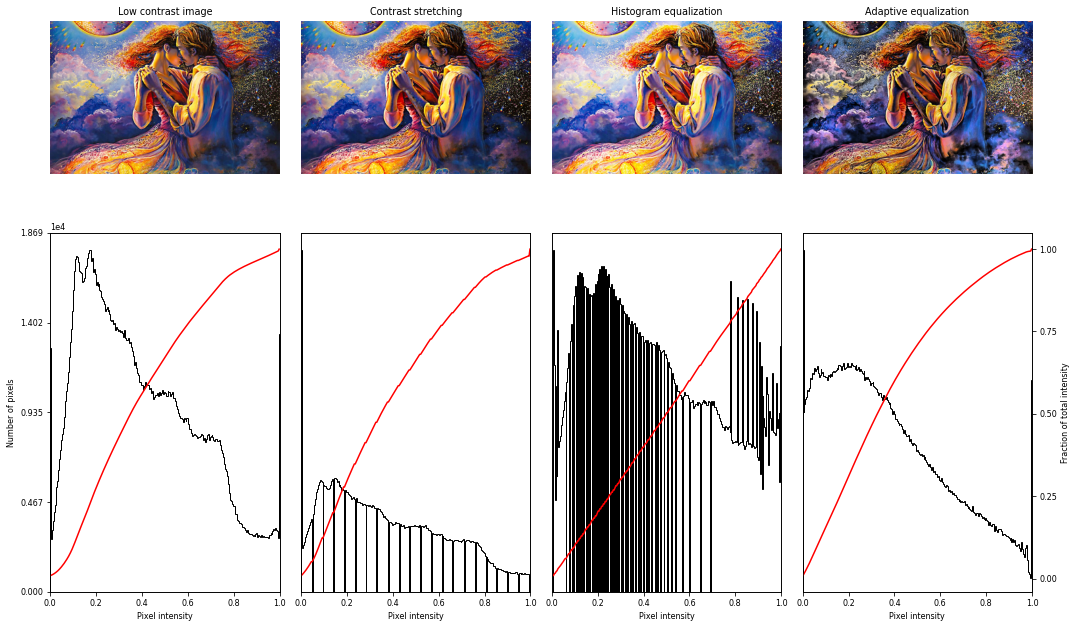

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Load an example image
img = image

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [45]:
#Dans skimage, par convention les images en flottant sont à valeur entre -1 et 1, afin d’assurer que toutes les images 
#aient la même plage de valeurs. La plage de valeurs d’une image retournée par une fonction peut donc être très différente 
#de celle de l’image d’entrée, dans le cas où le type a été modifié

In [46]:
print (img.min(), image.max())

0 255


In [47]:
print (img_eq.min(), img_eq.max())

0.005243292405638927 1.0


In [48]:
# Les fonctions skimage.img_as_float et skimage.img_as_ubyte permettent de faire la conversion entre les types sans se
# soucier des changements d’échelle.

In [49]:
# Quelques opérations de base avec numpy

In [50]:
# Mettre une image en noir et blanc
import cv2
imgGray = cv2.imread(r"C:\Users\Catherine\7e3d8e737aec8f1eca019302593c732e.jpg",0)

In [51]:
imgGray.shape

(733, 1100)

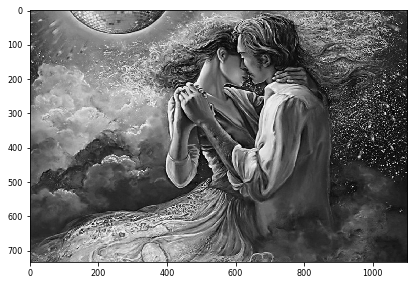

In [52]:
# L’affichage d’une image se fait grâce à la fonction skimage.io.imshow.
io.imshow(imgGray) #  

In [53]:
#Attention : pour l’indexation, la 1e dimension (axe 0) correspond aux lignes indicées de haut en bas, 
#    et la 2e dimension (axe 1) correspond aux colonnes de gauche à droite. 
#    C’est la convention des tableaux numpy.

In [54]:
pip install image-slicer

Note: you may need to restart the kernel to use updated packages.


In [54]:
import image_slicer
image_slicer.slice(r"C:\Users\Catherine\7e3d8e737aec8f1eca019302593c732e.jpg",4)

(<Tile #1 - 7e3d8e737aec8f1eca019302593c732e_01_01.png>,
 <Tile #2 - 7e3d8e737aec8f1eca019302593c732e_01_02.png>,
 <Tile #3 - 7e3d8e737aec8f1eca019302593c732e_02_01.png>,
 <Tile #4 - 7e3d8e737aec8f1eca019302593c732e_02_02.png>)

In [55]:
# 1er traitements d'images : Histogrammes 

In [56]:
# le 1er ax de travail (retouche) est la colorimétrie
# Nous allons rester sur des images codées en 24 bits (soit 2 puissance 8 = 256 valeurs possibles par canal)
#     En abscisse (Val. dans le graphe ci-dessous) les différentes valeurs de canaux/pixel
#     En ordonnée (Nb Pixel) le nombre de canaux/pixel qui possèdent cette valeur

In [35]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

In [58]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

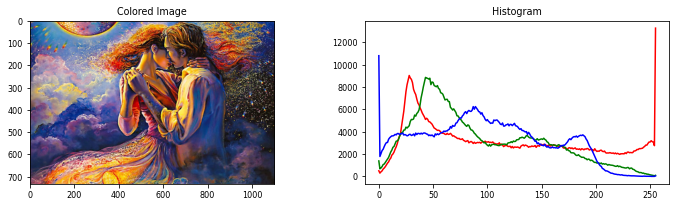

In [59]:
imageHist(image)

In [60]:
# sur ce graphique, 12 000 fois un pixel de valeur 250 pour le R, V 50 fois un pixel de valeur 9000, B 6000 fois un pixel de valeur 80

In [61]:
image1_Gray = imread(r"C:\Users\Catherine\7e3d8e737aec8f1eca019302593c732e.jpg", as_gray=True)

In [62]:
def histGrayScale(img, _xlim=255, _ylim=8200):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])

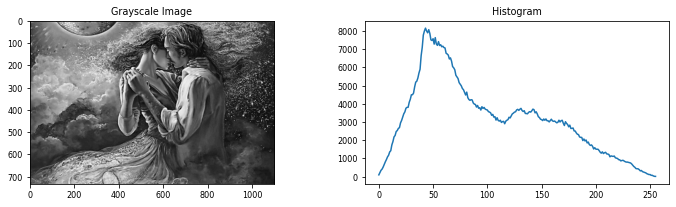

In [63]:
imageHist(image1_Gray)

In [64]:
# 1 seule courbe en nuance de gris , 8200 fois un pixel de valeur 48

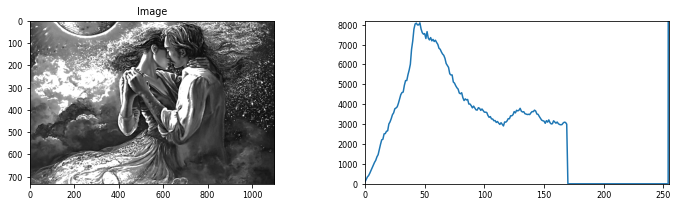

In [65]:
# 2eme traitement d'image : le seuillage 
# avec les histogrammes faits auparavant
# Dans cette image en niveau de gris on voit que la majorité des pixels ont une intensité de 48 à 170.

# Forçons tous les pixels au dessus de 170 à 255 pour voir ce que cela donne. 
image2 = np.where(image1_Gray>170/256, 1, image1_Gray)
histGrayScale(image2) 

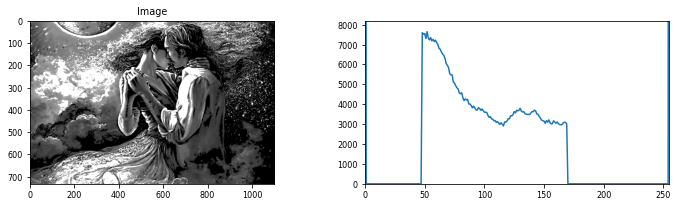

In [66]:
#On peut aussi retirer la partie de gauche de l’histogramme (pixels inférieurs à 48) :
image2 = np.where(image2<48/256, 0, image2)
histGrayScale(image2)

In [67]:
# Statistiques globales de l'image
def RGBStats(image): 
    colors = [] 
    for i in range(0, 3): 
        max_color =np.max(image[:,:,i]) 
        min_color =np.min(image[:,:,i]) 
        mean_color = np.mean(image[:,:,i]) 
        median_color = np.median(image[:,:,i]) 
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,  
                        index = ['Red', ' Green', 'Blue'], 
                        columns = ['Min', 'Max', 'Mean', 'Median'])
 
RGBStats(image)

Min  Max        Mean  Median
Red       0  255  113.968912   102.0
 Green    0  255   92.154316    76.0
Blue      0  255   97.417176    94.0

In [69]:
# Seuillage des images en couleur

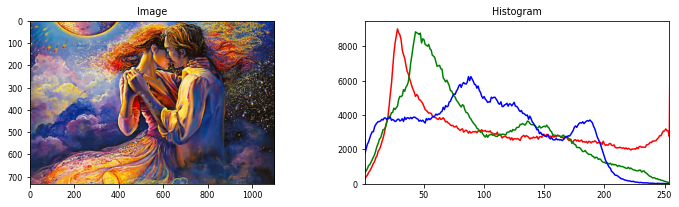

In [70]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 9500])
histColor(image)

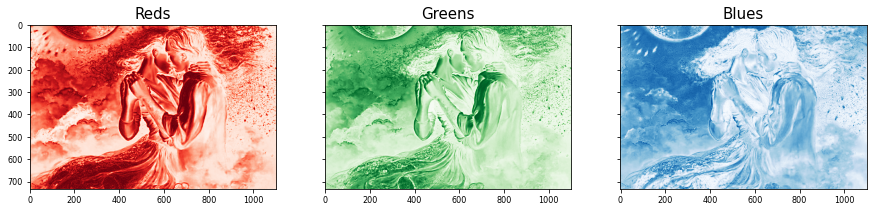

In [71]:
rgb_list = ['Reds','Greens','Blues'] 
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True) 
for i in range(3): 
   axes[i].imshow(image[:,:,i], cmap = rgb_list[i]) 
   axes[i].set_title(rgb_list[i], fontsize = 15)

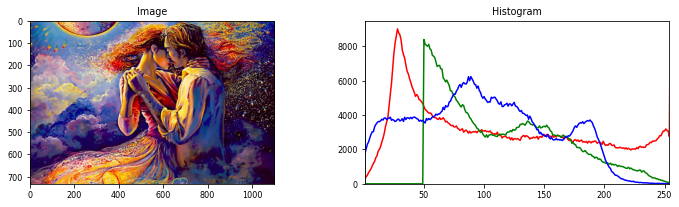

In [72]:
# Effectuons un seuillage sur le canal vert seulement en retirant les bleus d’intensité inférieure à 70 :
thresold_G = 49
image1_modified = image.copy()
image1_modified[:,:,1] = np.where(image[:,:,1]>thresold_G, 
                                  image[:,:,1], 
                                  0)
histColor(image1_modified)

In [73]:
# résultat de l’image à qui on a supprimé une bonne partie de son canal vert les verts d’intensité faible 

In [74]:
# Transformations de base : rottion , changement d'échelle et taille de l'image

In [75]:
from skimage import exposure, transform

In [76]:
# Le filtrage consiste à transformer une image par une autre image, en remplaçant la valeur d’un pixel par une fonction de 
# cette valeur mais aussi des valeurs des autres pixels de l’image. 
# On dit que le filtre est local si ce sont les valeurs des pixels voisins qui sont utilisées, non-local sinon 

In [77]:
# Un simple appel à la fonction transform.rotate() permet donc d’effectuer cette rotation sur l’angle voulu (ci-dessous 90°)
rotated = transform.rotate(image1_Gray, angle=180)
print(rotated)

[[0.19797529 0.14307333 0.12738706 ... 0.40546588 0.38384118 0.39837373]
 [0.16268118 0.10777922 0.09209294 ... 0.28611451 0.30819255 0.34571176]
 [0.13915176 0.0842498  0.06856353 ... 0.22755882 0.28690314 0.34065137]
 ...
 [0.23769216 0.21553882 0.2191698  ... 0.33054235 0.32016157 0.35153412]
 [0.2525451  0.22535412 0.22142471 ... 0.34779725 0.34836275 0.37973529]
 [0.27999608 0.24721686 0.24159804 ... 0.3701502  0.3679102  0.39928275]]


In [78]:
# e paramètre preserve_range qui permet de garder la même normalisation de nombre dans la matrice/image

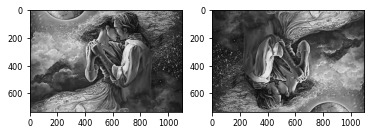

In [79]:
# Visualisons le résultat :
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image1_Gray, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

In [80]:
# Changement de taille
#Changer la taille d’une image est bien sur une opération courante. 
#Imaginons que l’on veuille augmenter la taille de notre image de 4×4 à 6×6. 
#Nous utiliserons pour cela la fonction transform.resize() en lui passant en paramètre le tuple (6,6)
resized_img = transform.resize(image=image1_Gray, output_shape=(6,6), preserve_range=True)

#Regardons l’image résultante :
print(resized_img)

[[0.49797855 0.54304641 0.49523219 0.38500443 0.39304561 0.34838976]
 [0.54484938 0.59468098 0.44246398 0.35658221 0.29417004 0.24771768]
 [0.60865511 0.61064612 0.43619474 0.40700479 0.30884527 0.20506936]
 [0.40261712 0.3832031  0.35745657 0.39829033 0.26742494 0.16887723]
 [0.29271063 0.3288667  0.38663084 0.30812469 0.22221788 0.18434477]
 [0.40756979 0.59660599 0.5341955  0.32318877 0.23241329 0.20206532]]


In [81]:
resized_img.shape

(6, 6)

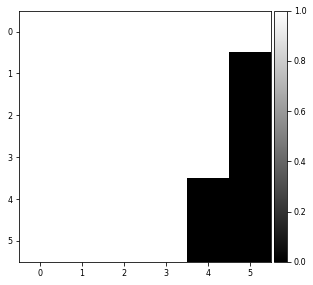

In [82]:
# nous avons dorénavant des nombres décimaux dans la matrice (donc des niveaux de gris). 
# Celà est en fait dû à l’agrandissement. 
# Repassons en pur noir et blanc pour avoir notre véritable agrandissement.
#Pour celà nous allons convertir les valeurs > 0,5 en 1 et les autres en zéro:

intresized = resized_img > 0.26
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

In [83]:
# changement d'echelle

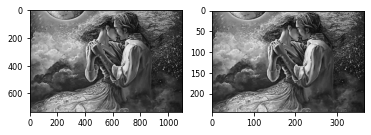

In [84]:
image_rescaled = transform.rescale(image=image1_Gray, scale=1.0 / 3.0, anti_aliasing=False,preserve_range=True) 
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image1_Gray, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

In [85]:
pip install -U scikit-image --user

In [86]:
# Transformations euclidiennes
import math

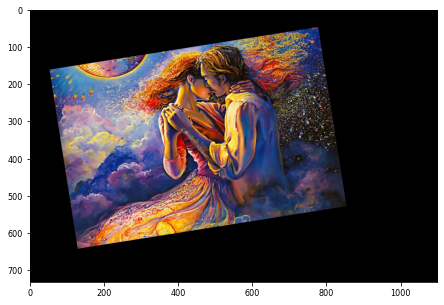

In [87]:
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
plt.figure(figsize=(8, 5))
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)

In [88]:
# En fait la rotation de l’image crée un décalage que nous corrigeons avec le paramètre translation 

In [89]:
# 5eme traitement de l'image : les transformations morphologiques - transition vers les filtres
# on a besoin de gabarits qui vont servir d'empreintes sur l'image source

In [90]:
# Regardons ici un gabarit tout simple en forme de disque (bon ok sur 3×3 pixels on dirait plutot une croix)

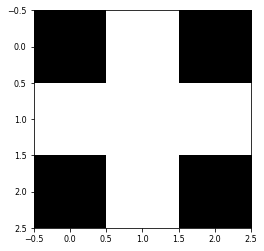

In [91]:
import numpy as np
from skimage import data
import matplotlib as plt
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap
 
imshow(morphology.disk(1), cmap=get_cmap('gray'))

In [92]:
# on va balayer chaque pixel de l'image cible avec ce gabarit

In [93]:
# Quand nous appliquerons un gabarit sur l’image, on centrera ce gabarit sur chaque pixel et 
# Si le pixel est égal à 57 on fera une empreinte du gabarit sur l’image (centré sur le pixel) 
# image dilatée =les sommes des hauteurs et largeurs de l’image originale et du gabarit.

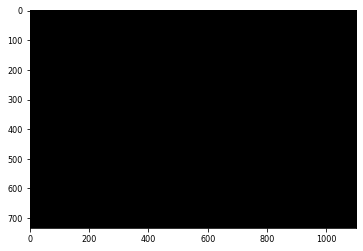

In [94]:
dilation = morphology.binary_dilation(image=imgGray, 
                                      selem=morphology.disk(57))
imshow(dilation, cmap=get_cmap('gray'))

In [95]:
imgGray

array([[106,  98,  98, ...,  62,  63,  71],
       [100,  92,  92, ...,  57,  57,  64],
       [ 92,  84,  86, ...,  56,  55,  60],
       ...,
       [ 91,  77,  62, ...,  18,  22,  36],
       [ 92,  83,  77, ...,  24,  28,  42],
       [106, 102, 107, ...,  33,  37,  51]], dtype=uint8)

In [96]:
image.dtype

dtype('uint8')

In [97]:
# Erosion : action inverse

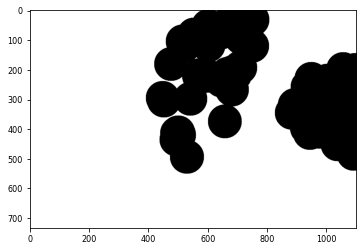

In [98]:
erosion = morphology.binary_erosion(imgGray, morphology.disk(57))
imshow(erosion, cmap=get_cmap('gray'))

In [99]:
# Filtres : a petite fenêtre glissante nous allons le généraliser mais surtout aller plus loin en y ajoutant des 
# opérations sur les valeurs de pixel
# ce principe de convolution va aussi être très utilisés par les réseaux de neurones (Deep Learning)
# Principe de convolution : le kernel ou fenêtre glissante va balayer les pixels de l'image cible de 
# haut en bas et gauche à droite, noyau de convolution ou masque de convolution

In [100]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt
 
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

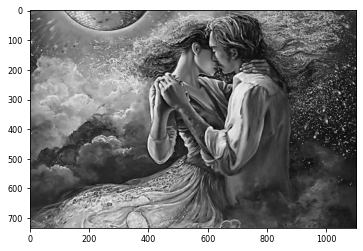

In [101]:
# image en noir et blanc
imshow(imgGray, 
       cmap=get_cmap('gray'))

In [102]:
imgGray

array([[106,  98,  98, ...,  62,  63,  71],
       [100,  92,  92, ...,  57,  57,  64],
       [ 92,  84,  86, ...,  56,  55,  60],
       ...,
       [ 91,  77,  62, ...,  18,  22,  36],
       [ 92,  83,  77, ...,  24,  28,  42],
       [106, 102, 107, ...,  33,  37,  51]], dtype=uint8)

In [103]:
# 1 kernel créé

In [104]:
kernel = np.ones((3,3), np.float32)/2

In [105]:
# Scipy fait le produit de convolution

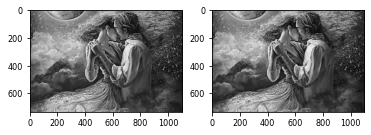

In [106]:
imgconvol = signal.convolve2d(imgGray, 
                              kernel, 
                              mode='same',
                              boundary='fill', 
                              fillvalue=0)
displayTwoBaWImages(imgGray, imgconvol)

In [107]:
imgconvol

array([[198. , 293. , 291.5, ..., 186.5, 187. , 127.5],
       [286. , 424. , 423. , ..., 274.5, 272.5, 185. ],
       [267.5, 397.5, 399. , ..., 273. , 267.5, 180.5],
       ...,
       [253. , 355. , 311. , ..., 104. , 128.5,  96.5],
       [275.5, 398.5, 371. , ..., 120.5, 145.5, 108. ],
       [191.5, 283.5, 276. , ...,  90.5, 107.5,  79. ]], dtype=float32)

In [108]:
imgGray

array([[106,  98,  98, ...,  62,  63,  71],
       [100,  92,  92, ...,  57,  57,  64],
       [ 92,  84,  86, ...,  56,  55,  60],
       ...,
       [ 91,  77,  62, ...,  18,  22,  36],
       [ 92,  83,  77, ...,  24,  28,  42],
       [106, 102, 107, ...,  33,  37,  51]], dtype=uint8)

In [109]:
# un flou a été créé sur l'image d'origine

In [110]:
# Détection de contours

In [111]:
kernel_contour = np.array([[0,1,0], 
                       [1,-4,1], 
                       [0,1,0]])

In [112]:
# Appliquons le filtre de convolution comme précédemment

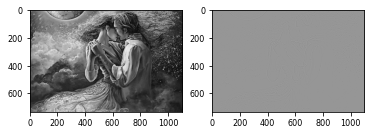

In [113]:
imgconvol = signal.convolve2d(imgGray, 
                              kernel_contour, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(imgGray, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

In [114]:
# augmentatin de contraste

In [115]:
kernel_inccontrast = np.array([[0,0,0,0,0], 
                               [0,0,-1,0,0], 
                               [0,-1,5,-1,0], 
                               [0,0,-1,0,0], 
                               [0,0,0,0,0]])

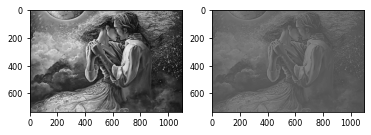

In [116]:
imgcontrast = signal.convolve2d(imgGray, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(imgGray, imgcontrast)

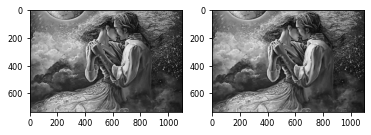

In [117]:
# Flouttage
kernel = np.array([[0,0,0,0,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,0,0,0,0]])
img = signal.convolve2d(imgGray, 
                        kernel, 
                        boundary='symm', 
                        mode='same')
displayTwoBaWImages(imgGray, img)

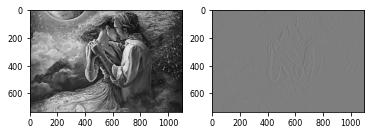

In [118]:
# Renforcement des bords
kernel = np.array([[0,0,0], 
                   [-1,1,0,], 
                   [0,0,0,]])
img = signal.convolve2d(imgGray, 
                        kernel, 
                        boundary='symm', 
                        mode='same')
displayTwoBaWImages(imgGray, img)

In [121]:
# Il existe bon nombre de noyaux de convolution déjà fournis et qui permettent comme nous venons de le voir d’effectuer des opérations sur les images.
# Nous verrons dans un prochain article comment les réseaux de neurones à convolution vont trouver et combiner des filtres
# de convolution pour détecter des formes plus complexes

In [122]:
#    Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
#    un algorithme de type SIFT / ORB / SURF ;
#    un algorithme de type CNN Transfer Learning

# features des images avec SIFT

In [136]:
pip install opencv-contrib-python

In [36]:
import argparse as ap
# Importing library that supports user friendly commandline interfaces
import cv2
# Importing the opencv library
import numpy as np
# Importing the array operations library for python
import os
# Importing the library which supports standard systems commands
from scipy.cluster.vq import *
# Importing the library which classifies set of observations into clusters
from sklearn.preprocessing import StandardScaler
# Importing the library that supports centering and scaling vectors
import matplotlib.pyplot as plt
%matplotlib inline

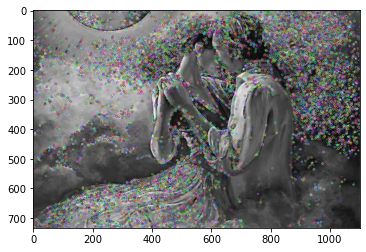

In [27]:
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#keypoints #sift = cv2.xfeatures2d.SIFT_create() 
sift = cv2.SIFT_create() 
keypoints_1, descriptors_1 = sift.detectAndCompute(image,None)

image = cv2.drawKeypoints(gray1,keypoints_1,image) 
plt.imshow(image)

# features des images avec ORB

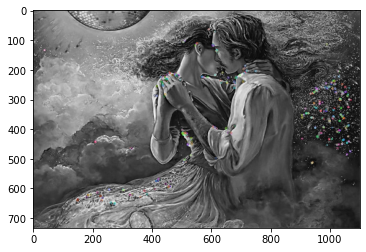

In [37]:
# ORB sur 1 image
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#keypoints #SURF = cv2.xfeatures2d.SURF_create() 
orb = cv2.ORB_create() 
#orb = cv2.xfeatures2d.ORB_create()
keypoints_1, descriptors_1 = orb.detectAndCompute(image,None)

image = cv2.drawKeypoints(gray1,keypoints_1,image) 
plt.imshow(image)

In [38]:
descriptors_1.shape 

(500, 32)

In [ ]:
# l'image contient 500 descripteurs - chaque descripteur est un vecteur de longueur 32

In [39]:
# Choix de 20 descripteurs aléatoirement
desc_samples = descriptors_1 [np.random.randint(descriptors_1.shape[0],size=20)]

In [40]:
desc_samples.shape

(20, 32)

In [41]:
# image preprocessing
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# Pré-traitement des images via SIFT ou ORB

# Créations des descripteurs de chaque image

In [32]:
#list_baby=[list_photos[i] for i in range(len(data)) if data["Categorie_1"][i]=="Baby Care"]

In [ ]:
# SIFT
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create()

#for image_num in range(len(list_photos)) :
for image_num in range(2) :  
    
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    #image = cv2.imread(path+list_photos[image_num]) 
    
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(image)):
        res = cv2.resize(image[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res) 
        
    # ----------------------------------
    # Remove noise
    # Gaussian
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)

    image1 = no_noise[1]
    
    # Segmentation
    #gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)       
    
    # Displaying segmented images
    # display(original, thresh, 'Original', 'Segmented')

    # Further noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)    
    
    # equalize image histogram
    res = cv2.equalizeHist(sure_bg)
    
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

In [55]:
# ORB
# identification of key points and associated descriptors
import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)) :
#for image_num in range(20) :  
    
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    #image = cv2.imread(path+list_photos[image_num]) 
    
    # setting dim of the resize
    #height = 1000
    #width = 1000
    #dim = (width, height)
    #res_img = []
    #for i in range(len(image)):
    #    res = cv2.resize(image[i], dim, interpolation=cv2.INTER_LINEAR)
    #    res_img.append(res) 
        
    # ----------------------------------
    # Remove noise
    # Gaussian
    no_noise = []
    for i in range(len(image)):
        blur = cv2.GaussianBlur(image[i], (5, 5), 0)
        no_noise.append(blur)

    image1 = no_noise[1]
    
    # Segmentation
    #gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)       
    
    # Displaying segmented images
    # display(original, thresh, 'Original', 'Segmented')

    # Further noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)    
    
    # equalize image histogram
    res = cv2.equalizeHist(sure_bg)
    
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4055: error: (-215:Assertion failed) inv_scale_x > 0 in function 'cv::resize'


In [56]:
# ORB avec peu de pre processing
# identification of key points and associated descriptors
import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)) :
#for image_num in range(20) :  
    
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
       
    # equalize image histogram
    res = cv2.equalizeHist(image)
    
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

In [ ]:
# Attention !  SIFT fait planter mon ordinateur !!!!!!!!! trop long et couteux en ressources machine

# SIFT
# identification of key points and associated descriptors
#import time, cv2
#sift_keypoints = []
#temps1=time.time()
#sift = cv2.xfeatures2d.SIFT_create()
#sift = cv2.SIFT_create()

#for image_num in range(len(list_photos)) :
#    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
#    res = cv2.equalizeHist(image)   # equalize image histogram
#    kp, des = sift.detectAndCompute(res, None)
#    sift_keypoints.append(des)

In [57]:
# ORB sans image pre processing
orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")


Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :           157.20 secondes


In [58]:
print (orb.descriptorSize())

32


In [ ]:
# Création des clusters de descripteurs

In [60]:
# Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :            17.19 secondes


In [ ]:
# Création des features des images

#    Pour chaque image :
#        prédiction des numéros de cluster de chaque descripteur
#        création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [ ]:
# Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [61]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             9.08 secondes


In [ ]:
# Réductions de dimension
# Réduction de dimension PCA

#    La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
#    L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [62]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 415)


In [ ]:
# Réduction de dimension T-SNE

# Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [63]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["Categorie_1"]
print(df_tsne.shape)

(1050, 3)


In [ ]:
# Analyse visuelle : affichage T-SNE selon catégories d'images

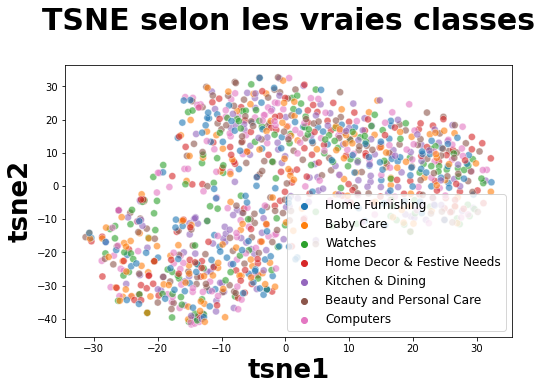

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 12}) 

plt.show()

In [ ]:
# Toutes les catégories sont mélangées

In [65]:
# Analyse mesures : similarité entre catégories et clusters
# Création de clusters à partir du T-SNE
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [ ]:
# Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

#    Le score ARI de 0.... reste faible

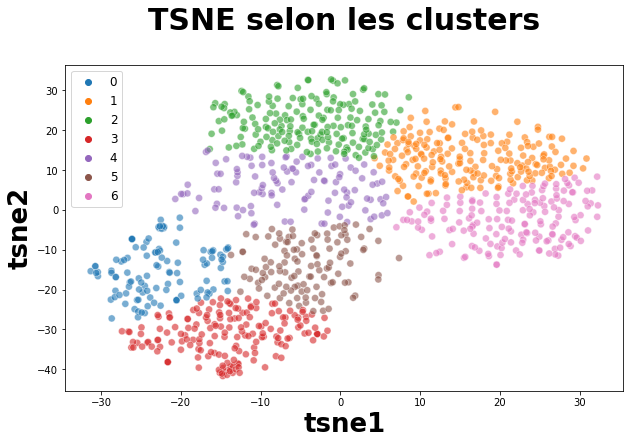

ARI :  0.00012083697761762373


In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 12}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [67]:
# Analyse par classes¶
df_tsne.groupby("cluster").count()["class"]

cluster
0    111
1    195
2    180
3    175
4    113
5    114
6    162
Name: class, dtype: int64

In [68]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[22 28 20 31 14 13 22]
 [14 33 34 17 15 20 17]
 [12 27 34 25 16 16 20]
 [15 24 21 28 25 11 26]
 [14 29 24 27 15 17 24]
 [15 28 23 22 13 25 24]
 [19 26 24 25 15 12 29]]


In [ ]:
# La matrice de confusion doit être transformée pour avoir en colonne le même ordre des catégories supposées 
# qu'en ligne (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")


In [74]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [3, 1, 2, 0, 4, 5, 6]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [3, 1, 2, 0, 4, 5, 6]
[[31 28 20 22 14 13 22]
 [17 33 34 14 15 20 17]
 [25 27 34 12 16 16 20]
 [28 24 21 15 25 11 26]
 [27 29 24 14 15 17 24]
 [22 28 23 15 13 25 24]
 [25 26 24 19 15 12 29]]

              precision    recall  f1-score   support

           0       0.18      0.21      0.19       150
           1       0.17      0.22      0.19       150
           2       0.19      0.23      0.21       150
           3       0.14      0.10      0.11       150
           4       0.13      0.10      0.11       150
           5       0.22      0.17      0.19       150
           6       0.18      0.19      0.19       150

    accuracy                           0.17      1050
   macro avg       0.17      0.17      0.17      1050
weighted avg       0.17      0.17      0.17      1050



<AxesSubplot:>

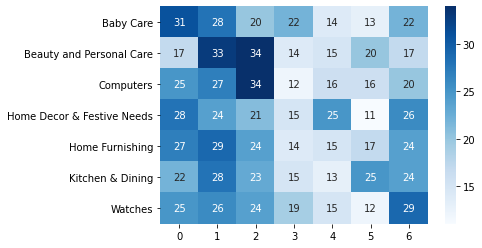

In [75]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in lab],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# Algorithme CNN : réseau de neurones à convolution

In [ ]:
# Réseau de neurones artificiel qui possède au moins une couche de convolution. 
# Une couche de convolution étant tout simplement une couche dans laquelle on va appliquer un certain nombre de filtres à convolution. 

In [ ]:
# L’idée derrière les filtres à convolution est qu’ils permettent de trouver des patterns, des formes dans les images

In [ ]:
# Les CNN permettent en effet de déterminer de manière progressive les différentes formes puis de les assembler pour en trouver d’autres. 

In [ ]:
# Avanatages de CNN : 
1 - paramètres plus petits que ppour un réseau de neurones classique, il faut trouver le kernel matrice en 2x2 ou 3x3
2 - calculs à effectuer sont simples : addition et multiplication de matrices

In [ ]:
# un CNN est un réseau de neurones qui va détecter progressivement les caractéristiques d'une image 

# classifier des images avec le modèle VGG-16 fourni par Keras et pré-entraîné sur ImageNet.

In [79]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

553476096/553467096 [==============================] - 127s 0us/step


In [81]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(r"C:\Users\Catherine\7e3d8e737aec8f1eca019302593c732e.jpg", target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [82]:
# Nous pouvons maintenant donner l'image en entrée du réseau et prédire sa classe :
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [ ]:
# On obtient la sortie finale du réseau, c'est-à-dire une liste de 1000 probabilités.
# (classification à 1000 classes avec ImageNet)

In [83]:
# Les classes correspondant à ces probabilités ne sont pas explicitement données. La fonction  decode_predictions  de 
#keras.applications.vgg16  permet alors de récupérer cette information. 
#Ainsi, on peut faire un top 3 des classes les plus probables de l'image : 
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

49152/35363 [=========================================] - 0s 1us/step
Top 3 : [('n06596364', 'comic_book', 0.6150252), ('n07248320', 'book_jacket', 0.20678397), ('n09256479', 'coral_reef', 0.042429455)]


# Transfer Learning

In [104]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'C:\\Users\\Catherine\\7e3d8e737aec8f1eca019302593c732e.jpg' 
img = load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [122]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

vgg16_feature_list = []

model = VGG16(weights='imagenet', include_top=False)

for i in range(1050):   
    
    img = image.load_img(data['image_rep'][i], target_size=(224, 224))
      
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [126]:
vgg16_feature_list_np.shape

(1050, 25088)

In [127]:
# 25088 features vectors par image
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", vgg16_feature_list_np.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(vgg16_feature_list_np)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 25088)
Dimensions dataset après réduction PCA :  (1050, 940)


In [128]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["Categorie_1"]
print(df_tsne.shape)

(1050, 3)


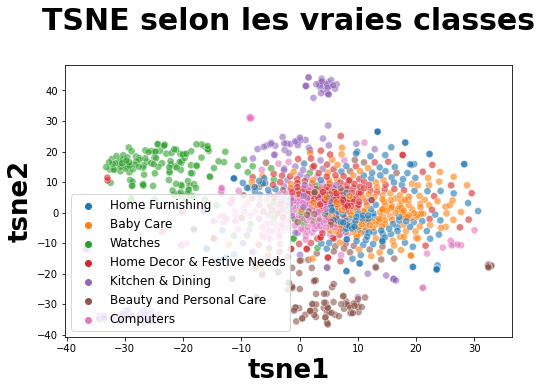

In [129]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 12}) 

plt.show()

In [130]:
# Analyse mesures : similarité entre catégories et clusters
# Création de clusters à partir du T-SNE
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


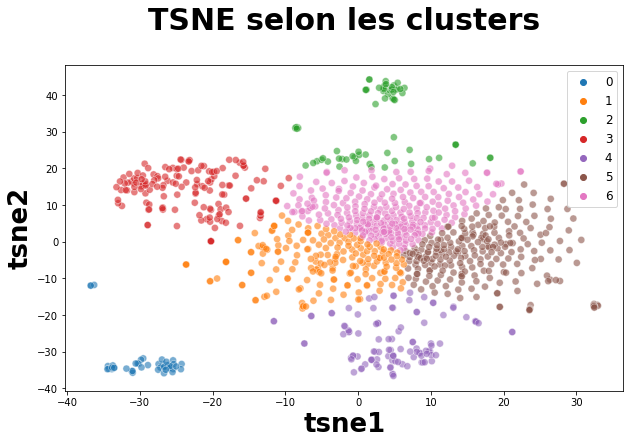

ARI :  0.31215539768617623


In [131]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 12}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
# les labels 4, 5 et 1 semblent imbriqués

In [132]:
# Analyse par classes¶
df_tsne.groupby("cluster").count()["class"]

cluster
0     44
1    184
2     71
3    147
4    108
5    231
6    265
Name: class, dtype: int64

In [133]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  0   5   1   0   1 110  33]
 [  0  30   0   0  87  15  18]
 [  0  92   8   9   3   9  29]
 [  0  22   2   2   3  19 102]
 [  0  11   6   3   5  78  47]
 [ 44  13  54   0   9   0  30]
 [  0  11   0 133   0   0   6]]


In [ ]:
# La matrice de confusion doit être transformée pour avoir en colonne le même ordre des catégories supposées 
# qu'en ligne (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [134]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [5, 1, 2, 3, 4, 0, 6]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [5, 1, 2, 3, 4, 0, 6]
[[110   5   1   0   1   0  33]
 [ 15  30   0   0  87   0  18]
 [  9  92   8   9   3   0  29]
 [ 19  22   2   2   3   0 102]
 [ 78  11   6   3   5   0  47]
 [  0  13  54   0   9  44  30]
 [  0  11   0 133   0   0   6]]

              precision    recall  f1-score   support

           0       0.48      0.73      0.58       150
           1       0.16      0.20      0.18       150
           2       0.11      0.05      0.07       150
           3       0.01      0.01      0.01       150
           4       0.05      0.03      0.04       150
           5       1.00      0.29      0.45       150
           6       0.02      0.04      0.03       150

    accuracy                           0.20      1050
   macro avg       0.26      0.20      0.19      1050
weighted avg       0.26      0.20      0.19      1050



<AxesSubplot:>

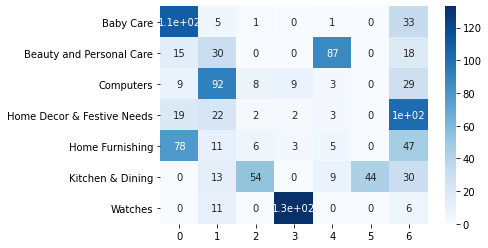

In [135]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in lab],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")